# Sharpe & Sortino Ratio Analysis

In this notebook we'll:
1. Load 1-minute BNB/USDT data  
2. Compute simple returns  
3. Define and compute Sharpe & Sortino ratios  
4. Visualize the return distribution and annotate the ratios  

In [10]:
# 1. Imports & settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

In [11]:
# 2. Load data
csv_path = "/Users/mchildress/Active Code/ts_basics/data/bnbusdt_1m.csv"
df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
df.head()

,close_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,timestamp
open_time,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:59.999,8.5478,8.5478,8.5300,8.5300,193.48,1650.404500,6,1.00,8.547800,1514764800
2018-01-01 00:01:00,2018-01-01 00:01:59.999,8.5300,8.5300,8.5300,8.5300,78.38,668.581400,6,0.00,0.000000,1514764860
2018-01-01 00:02:00,2018-01-01 00:02:59.999,8.5300,8.5300,8.5145,8.5145,71.39,608.258124,9,1.00,8.530000,1514764920
2018-01-01 00:03:00,2018-01-01 00:03:59.999,8.5065,8.5299,8.4848,8.4848,1546.82,13150.125692,45,2.91,24.773909,1514764980
2018-01-01 00:04:00,2018-01-01 00:04:59.999,8.5009,8.5066,8.4744,8.5066,125.80,1066.760100,14,24.88,211.506164,1514765040


In [12]:
# 3. Compute simple returns
df['ret'] = df['close'].pct_change()
df = df.dropna(subset=['ret'])

## 4. Define Sharpe & Sortino ratio functions
- **Sharpe**: $(\mu - r_f)/\sigma$, annualized  
- **Sortino**: $(\mu - r_f)/\sigma_{\rm downside}$, annualized

In [13]:
def sharpe_ratio(returns, rf=0.0, freq=525600):
    excess = returns - rf/freq
    mu_a = excess.mean()*freq
    sigma_a = returns.std()*np.sqrt(freq)
    return mu_a/sigma_a

def sortino_ratio(returns, rf=0.0, freq=525600):
    excess = returns - rf/freq
    mu_a = excess.mean()*freq
    down = returns[returns<0]
    sigma_down = down.std()*np.sqrt(freq)
    return mu_a/sigma_down

## 5. Compute & display

In [14]:
sh = sharpe_ratio(df['ret'])
so = sortino_ratio(df['ret'])
print(f"Sharpe Ratio (annualized): {sh:.2f}")
print(f"Sortino Ratio (annualized): {so:.2f}")

Sharpe Ratio (annualized): 1.13
Sortino Ratio (annualized): 1.32


Sharpe = 1.13 means your mean excess return is about 1.13 × your total return σ.
Sortino = 1.32 means your mean excess return is 1.32 × your downside σ (so only “bad” volatility is penalized).

This tells us that upside and downside moves are roughly symetric. > 1 suggests postitive risk-adjusted edge.

A Sharpe of 1.13, means for every 1 unit of total volatility I took, I earned 1.13 units of excess return.  A Sortino of 1.32 says for every 1 unit of downside volatility I took, I earned 1.32 units of excess return.

## 6. Plot return distribution & annotate

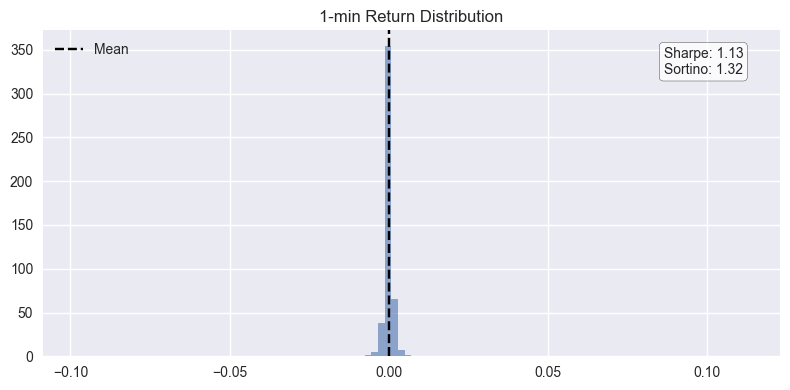

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['ret'], bins=100, density=True, alpha=0.6)
ax.axvline(df['ret'].mean(), color='k', linestyle='--', label='Mean')
ax.set_title('1-min Return Distribution')
ax.legend()
txt = f"Sharpe: {sh:.2f}\nSortino: {so:.2f}"  
ax.text(0.95,0.95, txt, transform=ax.transAxes, ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3',fc='white',alpha=0.8))
plt.tight_layout()

## 7. Cumulative performance comparison
- Compound both simple and log returns to visualize growth of $1.

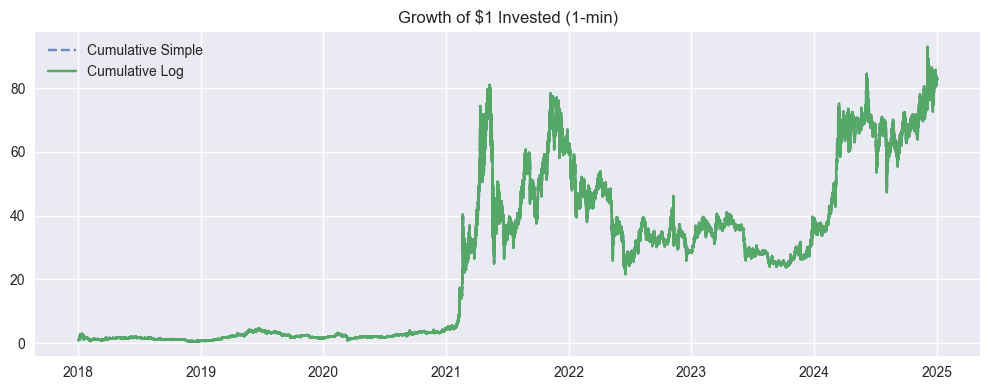

In [16]:
cum_simple = (1+df['ret']).cumprod()
cum_log    = np.exp(np.log1p(df['ret']).cumsum())

plt.figure(figsize=(10,4))
plt.plot(cum_simple, label='Cumulative Simple', linestyle='--', alpha=0.8)
plt.plot(cum_log,    label='Cumulative Log')
plt.title('Growth of $1 Invested (1-min)')
plt.legend()
plt.tight_layout()
plt.show()

---
### Takeaways
- **Sharpe** captures return per unit of total volatility.  
- **Sortino** focuses only on downside risk.  